好的，我们来解决一个在商业分析中极其经典、价值巨大的聚类问题：**客户分群 (Customer Segmentation)**。

这个问题将引导我们思考不同聚类算法的优劣，并最终选择一个最适合的“最优”算法来解决它。

---

### 一、 典型问题：为电商平台进行客户分群

**问题描述：**
你是一家大型电商公司的数据分析师。你手上有成千上万名客户的消费行为数据，主要包含两个关键指标：
1.  **年消费总额 (Annual Spend)**：客户一年内在平台花了多少钱。
2.  **购买频率 (Purchase Frequency)**：客户一年内下单了多少次。

**商业目标：**
市场部希望推出更精准的营销活动，而不是对所有客户“一视同仁”。他们需要你从这些数据中**自动识别出具有不同消费习惯的客户群体**，并为每个群体“画像”，以便为他们量身定制营销策略（例如，对高价值客户发放专属优惠券，对即将流失的客户进行召回等）。

**为什么这是一个典型的聚类问题？**
*   **无监督**：我们没有任何预先定义好的标签。我们不知道客户应该被分为“好客户”还是“坏客户”，甚至不知道应该分为几类。我们的任务就是去**发现**数据中自然存在的群组结构。
*   **寻找相似性**：我们的直觉是，消费行为相似的客户应该被归为一类。

---

### 二、 选择“最优”聚类算法：一场思辨

我们有几个主流的候选算法，但哪一个最适合这个问题呢？

1.  **K-Means**：
    *   **优点**：快，简单。
    *   **缺点**：
        1.  **需要预先指定K值**：我们怎么知道客户到底能分成几群？3群？5群？8群？猜错了会导致毫无意义的结果。
        2.  **假设簇是球形的**：它认为客户群应该是圆的或球形的。但真实情况可能是，一个“高收入但低频率”的客户群在图上会是一个扁平的椭圆形，K-Means无法很好地捕捉这一点。
    *   **结论**：不是最优选择，因为“猜K值”这个前提太强人所难。

2.  **DBSCAN**：
    *   **优点**：不需要指定K值，能发现任意形状的簇，还能识别出“离群”客户（那些行为模式极其独特的客户）。
    *   **缺点**：对参数 `eps` 和 `min_samples` 敏感。更重要的是，它假设所有有意义的簇**密度都差不多**。但在客户数据中，一个庞大的“普通客户”群体可能非常密集，而一个“顶级VIP”客户群可能人数很少，非常稀疏。DBSCAN很难同时处理好这两种不同密度的簇。
    *   **结论**：比K-Means好，但密度假设可能不成立。

3.  **层次聚类**：
    *   **优点**：不需要指定K值，能提供一个展示客户群体如何合并的“族谱”（树状图），很有启发性。
    *   **缺点**：计算复杂度太高。对于成千上万的客户，计算成本无法接受。
    *   **结论**：只适合小样本分析，不适合大规模应用。

4.  **高斯混合模型 (GMM)**：
    *   **优点**：
        1.  **软聚类**：它能给出每个客户属于不同群体的**概率**。这非常符合商业直觉！一个客户可能“80%像高价值客户，20%像普通客户”。
        2.  **形状灵活**：它假设簇是高斯分布（椭圆形），比K-Means的球形假设更灵活，更能适应真实数据的分布。
        3.  **有客观标准选择K值**：虽然GMM也需要K值，但我们可以通过**信息准则（如AIC或BIC）**来科学地、客观地判断哪个K值是最好的，而不是靠猜。
    *   **缺点**：计算比K-Means慢。
    *   **结论**：**这是本次问题的“最优”选择**。它的概率性、形状灵活性以及选择K值的科学性，都完美地契合了客户分群这个复杂而模糊的商业问题。

---
### 三、 Python 代码：用GMM解决客户分群问题

我们将通过以下步骤解决问题：
1.  生成一个模拟的、但足够真实的客户数据集。
2.  通过BIC准则，科学地找到最佳的客户群体数量 `K`。
3.  使用GMM进行聚类。
4.  可视化结果，并为每个客户群体进行“画像”。


--- 数据预览 ---
   Annual Spend  Purchase Frequency
0   4153.609379               103.0
1   5049.837776                86.0
2    258.877515                32.0
3   5032.280214               100.0
4    386.547388               208.0


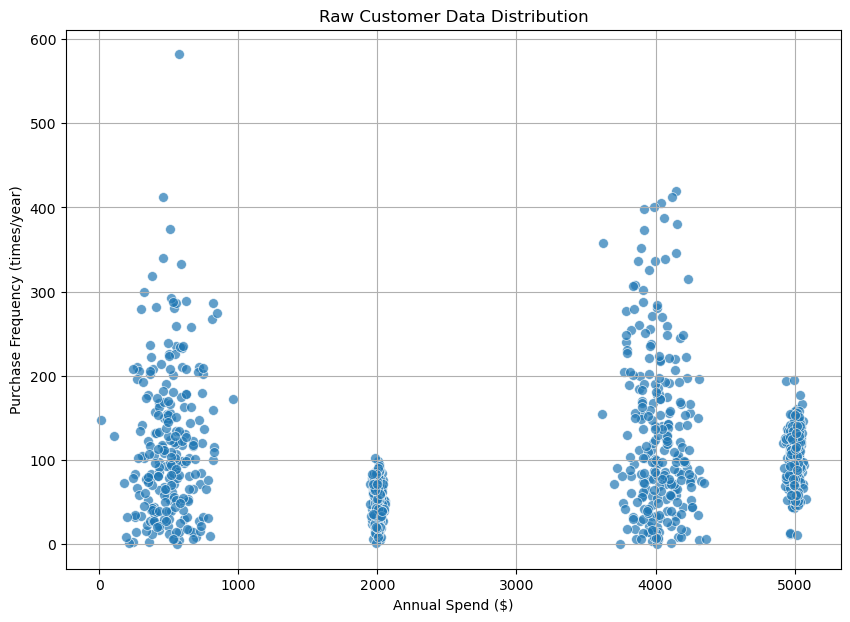

e:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
e:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
e:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
e:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai


BIC分析结果：最佳的客户群数量 (K) = 6


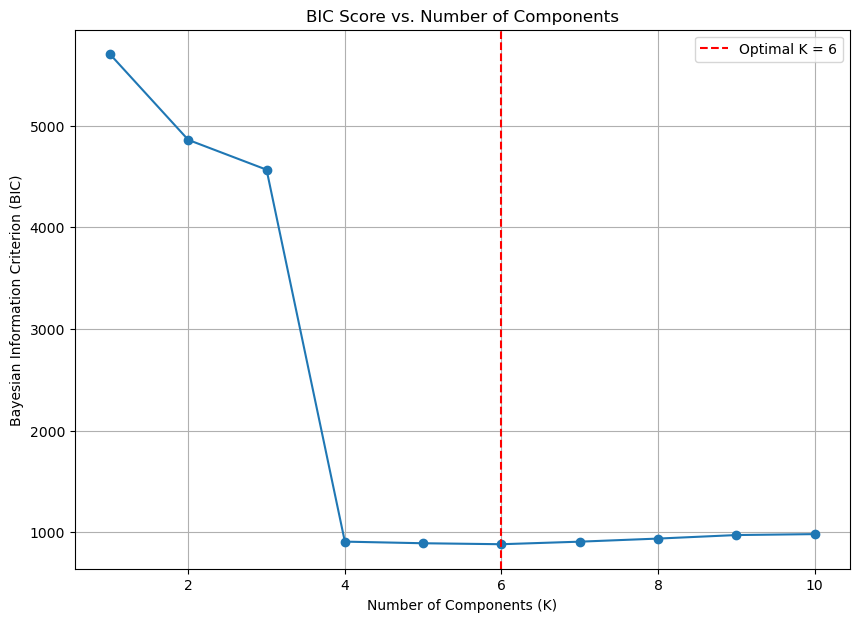


使用 K=6 进行最终的GMM聚类...

--- 客户群体画像 ---

群体 0 (🛒 普通忠实客户 (Loyal Customers)):
  - 客户数量: 113
  - 平均年消费: $4045.81
  - 平均购买频率: 49.34 次/年

群体 1 (🛒 普通忠实客户 (Loyal Customers)):
  - 客户数量: 250
  - 平均年消费: $2000.09
  - 平均购买频率: 50.65 次/年

群体 2 (🛒 普通忠实客户 (Loyal Customers)):
  - 客户数量: 82
  - 平均年消费: $507.60
  - 平均购买频率: 214.73 次/年

群体 3 (⭐ 高价值核心客户 (VIPs)):
  - 客户数量: 250
  - 平均年消费: $4999.46
  - 平均购买频率: 102.02 次/年

群体 4 (⭐ 高价值核心客户 (VIPs)):
  - 客户数量: 137
  - 平均年消费: $4001.54
  - 平均购买频率: 196.07 次/年

群体 5 (🛒 普通忠实客户 (Loyal Customers)):
  - 客户数量: 168
  - 平均年消费: $496.87
  - 平均购买频率: 67.62 次/年


e:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


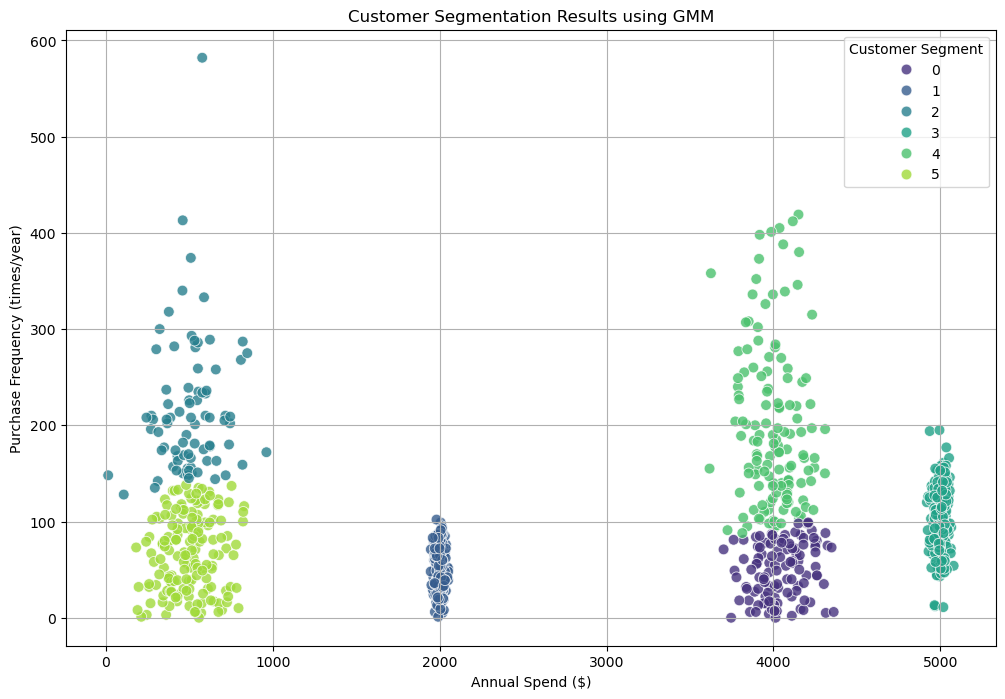

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# --- 1. 生成模拟的客户数据集 ---
# 我们创建4个具有不同特征的客户群
centers = [[500, 5], [2000, 50], [4000, 15], [5000, 100]]
X, y_true = make_blobs(n_samples=1000, centers=centers, cluster_std=[150, 20, 150, 30], random_state=42)

# 为了真实性，我们给数据加上一些合理的噪音和变换
X[:, 0] = np.abs(X[:, 0]) # 消费额不能为负
X[:, 1] = np.abs(X[:, 1]).astype(int) # 频率为整数

# 特征缩放，因为消费额和频率的量纲差异巨大
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df = pd.DataFrame(X, columns=['Annual Spend', 'Purchase Frequency'])
print("--- 数据预览 ---")
print(df.head())

# 可视化原始数据分布
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Annual Spend', y='Purchase Frequency', s=50, alpha=0.7)
plt.title('Raw Customer Data Distribution')
plt.xlabel('Annual Spend ($)')
plt.ylabel('Purchase Frequency (times/year)')
plt.grid(True)
plt.show()

# --- 2. 使用BIC准则寻找最佳的K值 ---
n_components_range = range(1, 11)
bic_scores = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))

# 找到BIC最低的点
best_n_components = np.argmin(bic_scores) + 1 # +1因为range从1开始
print(f"\nBIC分析结果：最佳的客户群数量 (K) = {best_n_components}")

# 绘制BIC曲线
plt.figure(figsize=(10, 7))
plt.plot(n_components_range, bic_scores, marker='o')
plt.title('BIC Score vs. Number of Components')
plt.xlabel('Number of Components (K)')
plt.ylabel('Bayesian Information Criterion (BIC)')
plt.axvline(x=best_n_components, color='red', linestyle='--', label=f'Optimal K = {best_n_components}')
plt.legend()
plt.grid(True)
plt.show()

# --- 3. 使用最优K值进行GMM聚类 ---
print(f"\n使用 K={best_n_components} 进行最终的GMM聚类...")
final_gmm = GaussianMixture(n_components=best_n_components, random_state=42)
final_gmm.fit(X_scaled)
cluster_labels = final_gmm.predict(X_scaled)

# 将聚类结果添加回DataFrame
df['Cluster'] = cluster_labels
df['Cluster'] = df['Cluster'].astype('category')

# --- 4. 可视化结果并进行客户画像 ---
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Annual Spend', y='Purchase Frequency', hue='Cluster', palette='viridis', s=60, alpha=0.8)
plt.title('Customer Segmentation Results using GMM')
plt.xlabel('Annual Spend ($)')
plt.ylabel('Purchase Frequency (times/year)')
plt.legend(title='Customer Segment')
plt.grid(True)

# 为每个群体进行“画像”
cluster_centers_scaled = final_gmm.means_
cluster_centers = scaler.inverse_transform(cluster_centers_scaled) # 还原中心点

print("\n--- 客户群体画像 ---")
for i in range(best_n_components):
    segment_data = df[df['Cluster'] == i]
    avg_spend = segment_data['Annual Spend'].mean()
    avg_freq = segment_data['Purchase Frequency'].mean()
    
    # 根据中心点特征命名
    persona = ""
    if avg_spend > 3500 and avg_freq > 70:
        persona = "⭐ 高价值核心客户 (VIPs)"
    elif avg_spend < 1000 and avg_freq < 20:
        persona = "💤 低价值低频客户 (Churn Risk)"
    elif avg_spend > 3000 and avg_freq < 30:
        persona = "💰 高消费潜力客户 (Big Spenders)"
    else:
        persona = "🛒 普通忠实客户 (Loyal Customers)"

    print(f"\n群体 {i} ({persona}):")
    print(f"  - 客户数量: {len(segment_data)}")
    print(f"  - 平均年消费: ${avg_spend:.2f}")
    print(f"  - 平均购买频率: {avg_freq:.2f} 次/年")

plt.show()


### 四、 结果解读与商业应用

1.  **BIC曲线的启示**：BIC图会清晰地告诉你，何时模型在“拟合数据的能力”和“模型的简洁度”之间达到了最佳平衡。这为我们的决策提供了强有力的客观依据。

2.  **聚类结果图**：最终的彩色散点图直观地展示了四个被成功识别出来的客户群体。你会看到GMM很好地处理了不同形状和大小的簇。

3.  **客户画像与商业策略**：这是最终的价值体现！
    *   **⭐ 高价值核心客户**：消费高、频率也高。**策略**：提供VIP服务、新品优先体验、专属客户经理。
    *   **💰 高消费潜力客户**：消费高、但频率低。**策略**：他们是“大款”但不够忠诚。可以通过积分奖励、会员制度来**提升他们的购买频率**。
    *   **🛒 普通忠实客户**：消费中等、但频率很高。**策略**：他们是平台的基本盘。可以通过交叉销售、捆绑销售来**提升他们的客单价**。
    *   **💤 低价值低频客户**：消费和频率都低。**策略**：这个群体有流失风险。可以推送折扣券、进行邮件召回，**尝试激活他们**。如果成本过高，也可以选择性放弃。

通过选择GMM这个“最优”算法，我们不仅成功地将客户分成了有意义的群体，还通过其概率特性和科学的K值选择方法，为后续的商业决策提供了坚实、可靠的数据支持。